<a href="https://colab.research.google.com/github/rich-hyun/Kuggle_9th_team_SAMTARBUCKS/blob/main/%EB%B6%84%EB%A5%98_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 전처리

In [2]:
!pip install nltk

In [3]:
import pandas as pd
from datetime import datetime
import calendar

# 데이터 로딩
df = pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Kuggle_9th_team_/main/reviews_data.csv',  encoding='utf-8')

# 'Date' 열에서 월, 일, 연도를 추출하여 새로운 열에 저장
# 'Reviewed' 다음에 오는 단어를 'mnth' 열에 저장
df['mnth'] = df['Date'].str.extract(r'Reviewed\s+([A-Za-z]+)')
df['day'] = df['Date'].str.extract(r'(\d{1,2}),').astype('int')
df['year'] = df['Date'].str.extract(r'(\d{4})').astype('int')

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
months_map = {
    'Jan': 1, 'Feb': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# 'mnth' 열의 월 이름을 숫자로 변환
df['mnth_num'] = df['mnth'].map(months_map)

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
month_mapping = {v: k for k,v in enumerate(calendar.month_name)}

# 월 이름을 월 번호로 변환
df['month_num'] = df['mnth'].map(month_mapping)

# 날짜로부터 요일을 계산하여 'day2' 열에 저장
df['day2'] = df.apply(lambda row: datetime.strptime(f"{row['year']}-{row['mnth_num']}-{row['day']}", '%Y-%m-%d').strftime('%A'), axis=1)

# 요일 이름을 숫자로 매핑하는 딕셔너리 생성
day_to_num = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# 'day2' 열의 요일 이름을 숫자로 변환
df['day2_num'] = df['day2'].map(day_to_num)

# 원하는 열만 선택 (새로운 'day2_num' 열을 포함하도록 업데이트)
df = df[['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num', 'Rating', 'Review']]

# 'Rating' 또는 'Review'가 NaN인 행을 제거
df.dropna(subset=['Rating', 'Review'], inplace = True)

df.head()

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...


In [ ]:
!pip install transformers
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
classifier("I love this!")

[{'label': 'joy', 'score': 0.9887555241584778}]

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis("I love this!"))

[{'label': 'POSITIVE', 'score': 0.9988656044006348}]


In [ ]:
!pip install transformers

from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
classifier("I love this!")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'anger', 'score': 0.004419787786900997},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.0004138524236623198},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'surprise', 'score': 0.008528684265911579}]]

###**EDA**

In [4]:
df

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...,...,...,...,...
696,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",2011,10,2,6,1.0,I ordered Via Starbucks coffee online. I recei...
697,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",2011,8,31,2,3.0,"My name is Ric **, I am journalist by professi..."
698,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",2011,8,24,2,1.0,"The bagel was ice cold, not cut and not toasted."
699,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",2011,8,15,0,1.0,"In the morning of Monday, August 15, 2011, at ..."


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 745
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      701 non-null    object 
 1   location  701 non-null    object 
 2   Date      701 non-null    object 
 3   year      701 non-null    int64  
 4   mnth_num  701 non-null    int64  
 5   day       701 non-null    int64  
 6   day2_num  701 non-null    int64  
 7   Rating    701 non-null    float64
 8   Review    701 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 54.8+ KB


In [7]:
df.describe()

,year,mnth_num,day,day2_num,Rating
count,701.000000,701.000000,701.000000,701.000000,701.000000
mean,2016.965763,6.857347,15.475036,2.958631,1.874465
std,3.231359,3.373369,8.956308,1.960248,1.400486
min,2010.000000,1.000000,1.000000,0.000000,1.000000
25%,2015.000000,4.000000,7.000000,1.000000,1.000000
50%,2017.000000,7.000000,15.000000,3.000000,1.000000
75%,2019.000000,10.000000,23.000000,5.000000,2.000000
max,2023.000000,12.000000,31.000000,6.000000,5.000000


In [8]:
df.isnull().sum()

name        0
location    0
Date        0
year        0
mnth_num    0
day         0
day2_num    0
Rating      0
Review      0
dtype: int64

In [9]:
df.columns

Index(['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num',
       'Rating', 'Review'],
      dtype='object')

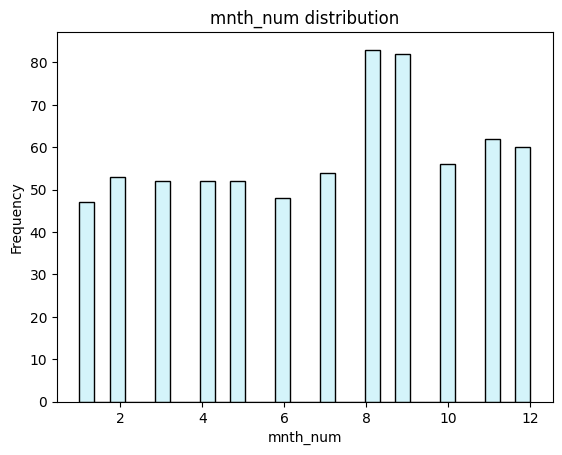

In [10]:
# mnth_num distribution
plt.hist(df['mnth_num'], bins=30, color='#D4F4FA', edgecolor='black')
plt.xlabel('mnth_num')
plt.ylabel('Frequency')
plt.title('mnth_num distribution')
plt.show()

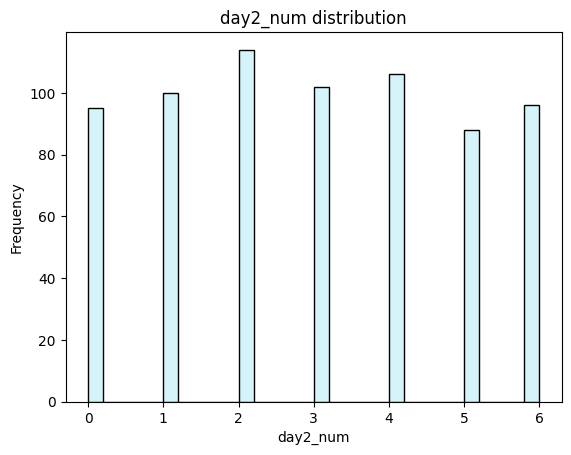

In [11]:
# day2_num distribution
plt.hist(df['day2_num'], bins=30, color='#D4F4FA', edgecolor='black')
plt.xlabel('day2_num')
plt.ylabel('Frequency')
plt.title('day2_num distribution')
plt.show()

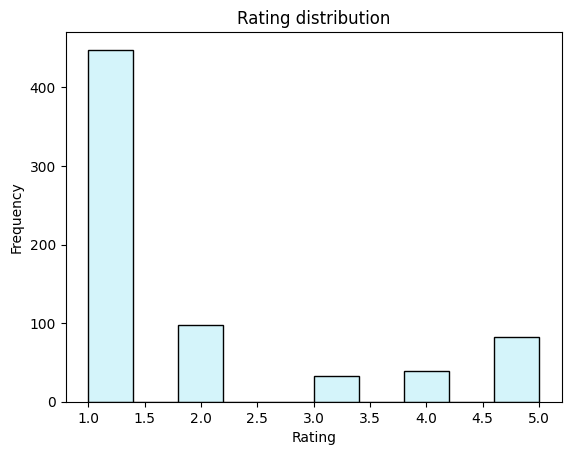

In [12]:
# Rating distribution
plt.hist(df['Rating'], color='#D4F4FA', edgecolor='black', bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating distribution')
plt.show()

In [24]:
!pip install transformers
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")

# 'review' 컬럼의 각 행에 대해 감정 분석 수행
results = []
for text in df['Review']:
    result = classifier(text)
    results.append(result)

[[{'label': 'joy', 'score': 0.5514743328094482}], [{'label': 'joy', 'score': 0.9522978663444519}], [{'label': 'joy', 'score': 0.8059460520744324}], [{'label': 'joy', 'score': 0.84089595079422}], [{'label': 'joy', 'score': 0.7876297831535339}], [{'label': 'anger', 'score': 0.5340039730072021}], [{'label': 'neutral', 'score': 0.9084550738334656}], [{'label': 'joy', 'score': 0.4079282879829407}], [{'label': 'neutral', 'score': 0.3988138437271118}], [{'label': 'neutral', 'score': 0.42953813076019287}], [{'label': 'anger', 'score': 0.5360485315322876}], [{'label': 'surprise', 'score': 0.7687058448791504}], [{'label': 'anger', 'score': 0.8987875580787659}], [{'label': 'neutral', 'score': 0.9390369653701782}], [{'label': 'neutral', 'score': 0.7776909470558167}], [{'label': 'neutral', 'score': 0.8544363975524902}], [{'label': 'neutral', 'score': 0.9029210805892944}], [{'label': 'surprise', 'score': 0.7638265490531921}], [{'label': 'neutral', 'score': 0.698632001876831}], [{'label': 'neutral', 

In [26]:
pd.DataFrame(results)

,0
0,"{'label': 'joy', 'score': 0.5514743328094482}"
1,"{'label': 'joy', 'score': 0.9522978663444519}"
2,"{'label': 'joy', 'score': 0.8059460520744324}"
3,"{'label': 'joy', 'score': 0.84089595079422}"
4,"{'label': 'joy', 'score': 0.7876297831535339}"
...,...
696,"{'label': 'neutral', 'score': 0.42804038524627..."
697,"{'label': 'anger', 'score': 0.5322983264923096}"
698,"{'label': 'neutral', 'score': 0.9756970405578613}"
699,"{'label': 'neutral', 'score': 0.9891321063041687}"


No charts were generated by quickchart


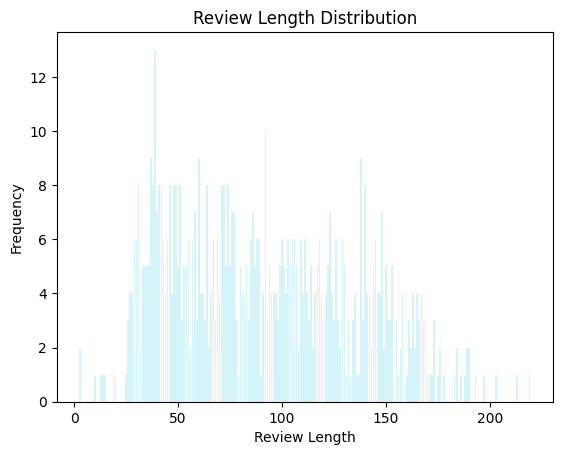

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_review_length_distribution(texts):
    # 리뷰 길이를 계산하여 Counter 객체 생성
    review_lengths = [len(sentence.split()) for sentence in texts]
    length_counts = Counter(review_lengths)

    # 그래프 생성
    plt.bar(length_counts.keys(), length_counts.values(), color='#D4F4FA')
    plt.title('Review Length Distribution')
    plt.xlabel('Review Length')
    plt.ylabel('Frequency')
    plt.show()

# 문장 길이 분포 시각화
plot_review_length_distribution(df['Review'])


### 토큰화

In [27]:
# 토큰화 위한 import
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
# 시간 : 특정 표현 들어가는 리뷰 인덱스 확인

# time

index_with_time = [idx for idx, review in enumerate(df['Review']) if 'time' in review.lower()]

print("Index of reviews containing 'time':", index_with_time)

Index of reviews containing 'time': [1, 5, 6, 11, 17, 19, 22, 34, 38, 39, 42, 45, 46, 47, 52, 58, 60, 63, 64, 67, 76, 78, 82, 83, 87, 89, 92, 94, 95, 96, 97, 98, 100, 102, 103, 104, 108, 115, 125, 126, 128, 132, 134, 145, 148, 150, 151, 153, 156, 157, 174, 179, 181, 183, 187, 188, 189, 190, 194, 196, 197, 198, 200, 201, 203, 206, 210, 213, 218, 220, 221, 222, 225, 226, 229, 231, 234, 237, 239, 241, 244, 245, 246, 247, 251, 256, 258, 259, 260, 266, 271, 272, 277, 278, 279, 282, 283, 284, 285, 287, 289, 302, 311, 314, 315, 324, 325, 327, 328, 331, 332, 339, 344, 366, 370, 377, 378, 379, 384, 385, 386, 388, 390, 392, 394, 397, 401, 405, 407, 408, 410, 413, 415, 417, 418, 419, 422, 425, 427, 429, 430, 432, 433, 434, 437, 439, 440, 447, 449, 451, 462, 463, 465, 466, 470, 471, 473, 474, 482, 483, 485, 487, 488, 491, 492, 497, 498, 499, 501, 502, 503, 506, 507, 509, 512, 513, 517, 520, 521, 524, 526, 534, 537, 542, 544, 546, 548, 550, 557, 558, 568, 570, 572, 576, 583, 585, 589, 591, 594, 597

In [47]:
df.iloc[index_with_time]['Review'].to_frame()

,Review
1,** at the Starbucks by the fire station on 436...
5,We had to correct them on our order 3 times. T...
6,I have tried Starbucks several different times...
11,Every time I try to buy a Strawberry Refresher...
17,I?셫 at 20th and L in DC. There are a dozen peo...
...,...
684,I really hate to complain but I felt I need to...
686,I visit Starbucks at least three times a week ...
690,I have been going to this star bucks by Miller...
691,I go at Star Bucks everyday and sometimes two ...


In [31]:
# time 포함 리뷰 토큰화
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def tokenize_time(time):
    tokens = word_tokenize(time)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

time_tokens = df.iloc[index_with_time]['Review'].apply(tokenize_time)
time_tokens.to_frame()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Review
1,"[*, *, Starbucks, fire, station, 436, Altamont..."
5,"[correct, order, 3, times, ., never, got, righ..."
6,"[tried, Starbucks, several, different, times, ..."
11,"[Every, time, try, buy, Strawberry, Refresher,..."
17,"[?, 셫, 20th, L, DC, ., dozen, people, one, emp..."
...,...
684,"[really, hate, complain, felt, need, let, know..."
686,"[visit, Starbucks, least, three, times, week, ..."
690,"[going, star, bucks, Miller, Park, several, ye..."
691,"[go, Star, Bucks, everyday, sometimes, two, ti..."


In [29]:
# wait

index_with_wait = [idx for idx, review in enumerate(df['Review']) if 'wait' in review.lower()]

print("Index of reviews containing 'wait':", index_with_wait)

Index of reviews containing 'wait': [17, 19, 24, 25, 26, 47, 64, 72, 73, 78, 81, 90, 94, 96, 114, 124, 126, 132, 140, 144, 146, 148, 152, 154, 164, 178, 194, 200, 210, 214, 216, 222, 244, 261, 279, 295, 318, 339, 344, 370, 372, 375, 390, 396, 402, 435, 436, 455, 459, 476, 483, 489, 491, 500, 501, 503, 515, 528, 533, 541, 565, 570, 616, 620, 626, 638, 640, 643, 660, 672, 676, 678, 680, 683, 690]


In [48]:
df.iloc[index_with_wait]['Review'].to_frame()

,Review
17,I?셫 at 20th and L in DC. There are a dozen peo...
19,Starbucks Como Lake. Bad attitude of the cashi...
24,During Covid their restrictions were over the ...
25,For me to come on here and leave a review for ...
26,Me and my Special needs son need to wait at a ...
...,...
676,You need to do something to help or straighten...
678,I was at Smiths grocery store #424 in Edgewood...
680,"I'm not sure if that is the correct date, but ..."
683,"Today, Friday November 25, 2011, I went to Sta..."


In [33]:
# wait 포함 리뷰 토큰화
def tokenize_wait(wait):
    tokens = word_tokenize(wait)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

wait_tokens = df.iloc[index_with_wait]['Review'].apply(tokenize_time)
wait_tokens.to_frame()

,Review
17,"[?, 셫, 20th, L, DC, ., dozen, people, one, emp..."
19,"[Starbucks, Como, Lake, ., Bad, attitude, cash..."
24,"[Covid, restrictions, top, still, require, sta..."
25,"[come, leave, review, store, town, east, (, Ne..."
26,"[Special, needs, son, need, wait, Starbucks, A..."
...,...
676,"[need, something, help, straighten, Ukiah, ,, ..."
678,"[Smiths, grocery, store, #, 424, Edgewood, ,, ..."
680,"['m, sure, correct, date, ,, close, ., run, sa..."
683,"[Today, ,, Friday, November, 25, ,, 2011, ,, w..."


No charts were generated by quickchart


In [50]:
# minute

index_with_minute = [idx for idx, review in enumerate(df['Review']) if 'minute' in review.lower()]

print("Index of reviews containing 'minute':", index_with_minute)

Index of reviews containing 'minute': [1, 17, 19, 32, 47, 55, 65, 129, 132, 138, 152, 184, 210, 221, 231, 258, 279, 295, 328, 381, 390, 394, 399, 402, 413, 436, 455, 459, 500, 502, 508, 524, 543, 561, 565, 576, 633, 646, 651, 659, 660, 664, 678, 690, 693]


In [51]:
df.iloc[index_with_minute]['Review'].to_frame()

,Review
1,** at the Starbucks by the fire station on 436...
17,I?셫 at 20th and L in DC. There are a dozen peo...
19,Starbucks Como Lake. Bad attitude of the cashi...
32,"In my opinion, I can't believe Starbucks has n..."
47,I did a Mobile order and it gave a time of 11:...
55,The website says that the store closes at 9:30...
65,45 minutes in line with the employees constant...
129,"On, November 21, 2020 my friend ordered a Vent..."
132,I forgot my mask realized and used my addition...
138,My 4 friends and myself were treated like scum...


In [52]:
# minute 포함 리뷰 토큰화
def tokenize_minute(minute):
    tokens = word_tokenize(minute)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

minute_tokens = df.iloc[index_with_minute]['Review'].apply(tokenize_time)
minute_tokens.to_frame()

,Review
1,"[*, *, Starbucks, fire, station, 436, Altamont..."
17,"[?, 셫, 20th, L, DC, ., dozen, people, one, emp..."
19,"[Starbucks, Como, Lake, ., Bad, attitude, cash..."
32,"[opinion, ,, ca, n't, believe, Starbucks, chan..."
47,"[Mobile, order, gave, time, 11:35am, ...., wen..."
55,"[website, says, store, closes, 9:30, pm, ., br..."
65,"[45, minutes, line, employees, constantly, dis..."
129,"[,, November, 21, ,, 2020, friend, ordered, Ve..."
132,"[forgot, mask, realized, used, additional, shi..."
138,"[4, friends, treated, like, scum, !, support, ..."


In [56]:
# index_with_minute, index_with_time, index_with_wait 의 교집합 확인
intersection = set(index_with_minute) & set(index_with_time) & set(index_with_wait)

# 결과 출력
print("Intersection of index sets:", intersection)

Intersection of index sets: {132, 390, 47, 17, 690, 19, 210, 279}


In [34]:
df.head()

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...


In [35]:
# 인종차별
index_with_racist = [idx for idx, review in enumerate(df['Review']) if 'racist' in review.lower()]

print("Index of reviews containing 'racist':", index_with_racist)

Index of reviews containing 'racist': [5, 184, 235, 541]


In [36]:
df.iloc[[5, 184, 235, 541]]['Review'].to_frame()

,Review
5,We had to correct them on our order 3 times. T...
184,Very bad customer service. The person who take...
235,Your mocha tastes like someone defecated in my...
541,My husband disabled has brain damage as well a...


In [49]:
df.iloc[index_with_racist]['Review'].to_frame()

,Review
5,We had to correct them on our order 3 times. T...
184,Very bad customer service. The person who take...
235,Your mocha tastes like someone defecated in my...
541,My husband disabled has brain damage as well a...


In [37]:
# racist 포함 리뷰 토큰화
def tokenize_racist(racist):
    tokens = word_tokenize(racist)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

racist_tokens = df.iloc[index_with_racist]['Review'].apply(tokenize_time)
racist_tokens.to_frame()

,Review
5,"[correct, order, 3, times, ., never, got, righ..."
184,"[bad, customer, service, ., person, takes, ord..."
235,"[mocha, tastes, like, someone, defecated, cup,..."
541,"[husband, disabled, brain, damage, well, physi..."


### 피처 추출

In [40]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 사용하여 BoW 피처 추출
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Review'])

# 피처의 이름들과 BoW 표현 출력
feature_names = vectorizer.get_feature_names_out()
print("Feature names:", feature_names)
print("BoW representation:")
print(X.toarray())

Feature names: ['00' '000' '000php' ... '짙1' '짙10' '짙100']
BoW representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
pd.DataFrame(feature_names)

,0
0,00
1,000
2,000php
3,00am
4,01
...,...
5519,쐗ell
5520,쐙ou
5521,짙1
5522,짙10
